In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Price.csv",parse_dates=True, index_col='1/5/2021')
# Display the first few rows
print(data)

              Tomato Big(Nepali)  Kg        50        60        55
1/5/2021                                                          
1/5/2021      Tomato Big(Indian)  Kg        50        60        55
1/5/2021     Tomato Small(Local)  Kg        30        35      32.5
1/5/2021    Tomato Small(Tunnel)  Kg        30        35      32.5
1/5/2021    Tomato Small(Indian)  KG        40        45      42.5
1/5/2021     Tomato Small(Terai)  KG        40        45      42.5
...                          ...  ..       ...       ...       ...
2023-09-28  Tomato Small(Indian)  KG  Rs 45.00  Rs 55.00  Rs 50.00
2023-09-28   Tomato Small(Local)  KG  Rs 50.00  Rs 60.00  Rs 55.00
2023-09-28  Tomato Small(Tunnel)  KG  Rs 60.00  Rs 75.00  Rs 69.00
2023-09-28              Turnip A  KG  Rs 70.00  Rs 80.00  Rs 75.00
2023-09-28    Water Melon(Green)  KG  Rs 50.00  Rs 60.00  Rs 56.67

[96479 rows x 5 columns]


In [2]:
data = data[data.iloc[:, 0] == "Tomato Big(Indian)"]

In [3]:
data.rename_axis('Date',inplace=True);data.rename(columns={
    'Tomato Big(Nepali)': 'Tomato',
    '50': 'MinPrice',
    '60': 'MaxPrice',
    '55': 'AvgPrice',
}, inplace=True)

In [4]:
for column in ['MinPrice', 'MaxPrice', 'AvgPrice']:
    data[column] = data[column].str.replace(r'Rs ', '', regex=True).str.replace(',', '', regex=True)

In [5]:
data.drop(['Kg'], axis=1,inplace=True)

In [6]:
data.index = pd.to_datetime(data.index,format='mixed')

In [7]:
data

,Tomato,MinPrice,MaxPrice,AvgPrice
Date,,,,
2021-01-05,Tomato Big(Indian),50,60,55
2021-01-06,Tomato Big(Indian),50,60,55
2021-01-07,Tomato Big(Indian),45,50,47.5
2021-01-08,Tomato Big(Indian),50,55,52.5
2021-01-09,Tomato Big(Indian),40,50,45
...,...,...,...,...
2023-09-24,Tomato Big(Indian),35.00,45.00,40.00
2023-09-25,Tomato Big(Indian),30.00,35.00,32.50
2023-09-26,Tomato Big(Indian),35.00,45.00,40.00


In [8]:
data = data[(data.index > '2022-09-01') & (data.index <= '2023-08-30')]

In [9]:
data['MinPrice'] = data['MinPrice'].astype('float64')
data['MaxPrice'] = data['MaxPrice'].astype('float64')
data['AvgPrice'] = data['AvgPrice'].astype('float64')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\1111030793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MinPrice'] = data['MinPrice'].astype('float64')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\1111030793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MaxPrice'] = data['MaxPrice'].astype('float64')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\1111030793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [10]:
tomato_df=data

In [11]:
tomato_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2022-09-02 to 2023-08-30
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tomato    302 non-null    object 
 1   MinPrice  302 non-null    float64
 2   MaxPrice  302 non-null    float64
 3   AvgPrice  302 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.8+ KB


In [12]:
tomato_df

,Tomato,MinPrice,MaxPrice,AvgPrice
Date,,,,
2022-09-02,Tomato Big(Indian),55.0,60.0,58.33
2022-09-03,Tomato Big(Indian),50.0,55.0,52.50
2022-09-04,Tomato Big(Indian),50.0,60.0,55.00
2022-09-05,Tomato Big(Indian),55.0,60.0,57.50
2022-09-06,Tomato Big(Indian),55.0,60.0,58.33
...,...,...,...,...
2023-08-26,Tomato Big(Indian),100.0,110.0,105.00
2023-08-27,Tomato Big(Indian),90.0,100.0,95.00
2023-08-28,Tomato Big(Indian),80.0,90.0,85.00


In [13]:
from Descriptive import Descriptive

In [14]:
obj=Descriptive()

In [15]:
maxPrice=tomato_df["MaxPrice"]

In [16]:
maxPrice

Date
2022-09-02     60.0
2022-09-03     55.0
2022-09-04     60.0
2022-09-05     60.0
2022-09-06     60.0
              ...  
2023-08-26    110.0
2023-08-27    100.0
2023-08-28     90.0
2023-08-29     80.0
2023-08-30     80.0
Name: MaxPrice, Length: 302, dtype: float64

In [17]:
#segregating the quantitrative and qualitative variables in the stock dataset
dataset=tomato_df
quan,qual=obj.segreQuanQual(dataset)

The Quantitative Data: ['MinPrice', 'MaxPrice', 'AvgPrice']
The Qualtitative Data ['Tomato']


In [18]:
des_data=obj.descriptive_Analysis(dataset,quan)

D:\Hope AI\Week12-Time Series Analysis\TS-Model\Assignment\Descriptive.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  des_data[i]["Null_count"]=dataset[i].isnull().sum()
D:\Hope AI\Week12-Time Series Analysis\TS-Model\Assignment\Descri

In [19]:
des_data

,MinPrice,MaxPrice,AvgPrice
Null_count,0,0,0
NonNull_count,302,302,302
Total_Count,302,302,302
Mean,53.188742,62.980132,58.649238
Median,50.0,60.0,55.0
Mode,50.0,60.0,55.0
Std,16.873404,17.479735,17.126613
Min,30.0,40.0,35.0
Max,150.0,160.0,155.0
Q1:25%,40.0,50.0,46.67


In [20]:
#probability distribution function which shows the area between given range
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,standard deviation=%.3f' % (sample_mean,sample_std))
    dist=norm(sample_mean,sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\404112669.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=58.649,standard deviation=17.127
The area between range(60,100):0.471661377727276


0.471661377727276

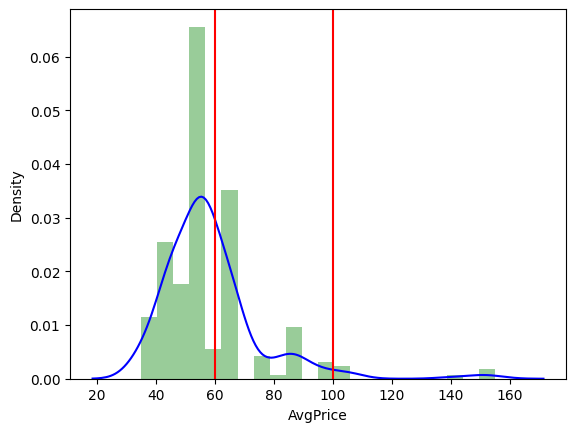

In [21]:
get_pdf_probability(dataset["AvgPrice"],60,100)

In [22]:
def adf_test_for_columns(df, columns):
    def adf_test(timeseries):
        from statsmodels.tsa.stattools import adfuller
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)
        print("Condition:")
        print("p-value<=0.05-->Accept Alternate Hypothesis")
        print("p-value>0.05-->Accept Null Hypothesis")
        if (dfoutput['Test Statistic'] < dfoutput["Critical Value (1%)"] or
            dfoutput['Test Statistic'] < dfoutput["Critical Value (5%)"] or
            dfoutput['Test Statistic'] < dfoutput["Critical Value (10%)"] and
            dfoutput["p-value"] < 0.05):
            print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
            print("Reject null hypothesis:Non Stationarity")
            print("Accept Alternate hypothesis:Stationarity ")
            print("Stationarity based on ADH")
        else:
            print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
            print("Accept null hypothesis:Non Stationarity")
            print("Reject Alternate hypothesis:Stationarity ")
            print("Non-stationarity based on ADH*******************Applying difference and testing for Stationarity************")
            timeseries = timeseries.diff().dropna()
            adf_test(timeseries)
        return timeseries

    statORnot = {}
    for column in columns:
        print(f"\nTesting column: {column}")
        statORnot[column] = adf_test(df[column])
    
    return statORnot


In [23]:
columns_to_test = ['MinPrice', 'MaxPrice', 'AvgPrice']
statORnot = adf_test_for_columns(tomato_df, columns_to_test)


# Print the results
for column, output in statORnot.items():
    print(f"Column: {column}, Result: {output}")
   


Testing column: MinPrice
Results of Dickey-Fuller Test:
Test Statistic                  -1.816887
p-value                          0.372111
#Lags Used                      16.000000
Number of Observations Used    285.000000
Critical Value (1%)             -3.453505
Critical Value (5%)             -2.871735
Critical Value (10%)            -2.572202
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Stationarity 
Non-stationarity based on ADH*******************Applying difference and testing for Stationarity************
Results of Dickey-Fuller Test:
Test Statistic                  -4.389076
p-value                          0.000310
#Lags Used                      15.000000
Number of Observations Used    285.000000
Critical Value (1%)             -3.453505
Critical Value (5%)     

In [24]:
statORnot

{'MinPrice': Date
 2022-09-03    -5.0
 2022-09-04     0.0
 2022-09-05     5.0
 2022-09-06     0.0
 2022-09-07     0.0
               ... 
 2023-08-26     0.0
 2023-08-27   -10.0
 2023-08-28   -10.0
 2023-08-29   -10.0
 2023-08-30     0.0
 Name: MinPrice, Length: 301, dtype: float64,
 'MaxPrice': Date
 2022-09-03    -5.0
 2022-09-04     5.0
 2022-09-05     0.0
 2022-09-06     0.0
 2022-09-07     0.0
               ... 
 2023-08-26     0.0
 2023-08-27   -10.0
 2023-08-28   -10.0
 2023-08-29   -10.0
 2023-08-30     0.0
 Name: MaxPrice, Length: 301, dtype: float64,
 'AvgPrice': Date
 2022-09-03    -5.83
 2022-09-04     2.50
 2022-09-05     2.50
 2022-09-06     0.83
 2022-09-07     0.00
               ...  
 2023-08-26     0.00
 2023-08-27   -10.00
 2023-08-28   -10.00
 2023-08-29   -10.00
 2023-08-30     0.00
 Name: AvgPrice, Length: 301, dtype: float64}

In [26]:
tomato_stat = pd.DataFrame(statORnot)

In [27]:
tomato_stat

,MinPrice,MaxPrice,AvgPrice
Date,,,
2022-09-03,-5.0,-5.0,-5.83
2022-09-04,0.0,5.0,2.50
2022-09-05,5.0,0.0,2.50
2022-09-06,0.0,0.0,0.83
2022-09-07,0.0,0.0,0.00
...,...,...,...
2023-08-26,0.0,0.0,0.00
2023-08-27,-10.0,-10.0,-10.00
2023-08-28,-10.0,-10.0,-10.00


In [29]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(tomato_stat)
print("Len:",data1.shape)

Len: (301, 3)


In [30]:
dataset=pd.DataFrame(data1,columns=["MinPrice","MaxPrice","AvgPrice"])

In [31]:
performance={"Model":[],"RMSE":[],"MaPe":[],"Order":[]}

In [57]:
# Function to fit and evaluate VARMAX model
def cominbation(dataset,listt):
    print(listt)
    datasetTwo=dataset[listt]
    training_size=round(len(dataset) * 0.80)    
    X_train =datasetTwo[:training_size]
    X_test = datasetTwo[training_size:]
    y_train=datasetTwo[:training_size]
    y_test=datasetTwo[training_size:]
    from statsmodels.tsa.api import VARMAX
    best_aic = float('inf')
    best_order = None
    best_model = None
    orders=[(1,1),(1,2),(2,1),(2,2),(3,1),(3,2),(4,1),(4,2),(3,3),(4,4)]
    for i in orders:
        print(i)
        model = VARMAX(X_train,order=i, trend='c') # c indicates a constant trend
        results = model.fit(maxiter=5, disp=False)
        print('Order =', i)
        print('AIC: ', results.aic)
        print('BIC: ', results.bic)
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = i
            best_model=results
    for_steps=len(y_test)
    pred = best_model.get_forecast(for_steps).predicted_mean
    from sklearn.metrics import mean_squared_error
    rmse= round(mean_squared_error(y_test,pred,squared=False))
    from sklearn.metrics import mean_absolute_percentage_error
    mape=mean_absolute_percentage_error(y_test,pred)
    performance["Model"].append(listt)
    performance["RMSE"].append(rmse)
    performance["MaPe"].append(mape)
    performance["Order"].append(best_order)
    perf1=pd.DataFrame(performance)
    return perf1,best_model,pred,X_train,y_test
    #result.summary()

In [58]:
list1=["MinPrice","MaxPrice","AvgPrice"]

In [59]:
perf1,best_model,pred,X_train,y_test=cominbation(dataset,list1)

['MinPrice', 'MaxPrice', 'AvgPrice']
(1, 1)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (1, 1)
AIC:  -4500.14684274927
BIC:  -4406.057325545023
(1, 2)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (1, 2)
AIC:  -4550.271148923122
BIC:  -4424.818459317459
(2, 1)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (2, 1)
AIC:  -4519.431411117785
BIC:  -4393.978721512121
(2, 2)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (2, 2)
AIC:  -4511.447630317436
BIC:  -4354.631768310356
(3, 1)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (3, 1)
AIC:  -4522.871641803161
BIC:  -4366.055779796081
(3, 2)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (3, 2)
AIC:  -4508.923709435231
BIC:  -4320.744675026735
(4, 1)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (4, 1)
AIC:  -4527.173106524499
BIC:  -4338.994072116004
(4, 2)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (4, 2)
AIC:  -4512.468605303969
BIC:  -4292.926398494057
(3, 3)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (3, 3)
AIC:  -4504.48140132582
BIC:  -4284.939194515909
(4, 4)


C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (4, 4)
AIC:  -4489.76112508613
BIC:  -4207.492573473387


In [60]:
perf1

,Model,RMSE,MaPe,Order
0,"[MinPrice, MaxPrice, AvgPrice]",0,2.172503e+13,"(1, 2)"
1,"[MinPrice, MaxPrice, AvgPrice]",0,2.172503e+13,"(1, 2)"


In [61]:
# Forecasting for the next 7 steps
forecast=best_model.forecast(steps=60)

In [62]:
forecast

,MinPrice,MaxPrice,AvgPrice
241,0.264676,0.310563,0.291072
242,0.264580,0.310788,0.289450
243,0.266704,0.312630,0.290003
244,0.266044,0.311975,0.289918
245,0.266270,0.312247,0.289937
246,0.266190,0.312126,0.289929
247,0.266218,0.312182,0.289934
248,0.266208,0.312156,0.289931
249,0.266211,0.312168,0.289932
250,0.266210,0.312162,0.289932


In [63]:
# Inverse transform the forecast
forecast_ori=Ms.inverse_transform(forecast)

In [64]:
from stockFunctions import conversionSingle
forecast_ori_in_df_Form=conversionSingle(forecast_ori,tomato_stat)

In [65]:
forecast_ori_in_df_Form

,MinPrice,MaxPrice,AvgPrice
0,-0.298667,-0.309928,0.116164
1,-0.312944,-0.273879,-0.135299
2,0.005639,0.020858,-0.049591
3,-0.09347,-0.083932,-0.062648
4,-0.059504,-0.040482,-0.059775
5,-0.071575,-0.05982,-0.060972
6,-0.067284,-0.050938,-0.060292
7,-0.068774,-0.055084,-0.060688
8,-0.068281,-0.053129,-0.060465
9,-0.06843,-0.054058,-0.060587


In [66]:
last_known_value = tomato_df.iloc[-1]
recovered_forecast = tomato_stat.cumsum() + last_known_value

In [67]:
recovered_forecast

,AvgPrice,MaxPrice,MinPrice,Tomato
Date,,,,
2022-09-03,69.17,75.0,65.0,NaN
2022-09-04,71.67,80.0,65.0,NaN
2022-09-05,74.17,80.0,70.0,NaN
2022-09-06,75.0,80.0,70.0,NaN
2022-09-07,75.0,80.0,70.0,NaN
...,...,...,...,...
2023-08-26,121.67,130.0,115.0,NaN
2023-08-27,111.67,120.0,105.0,NaN
2023-08-28,101.67,110.0,95.0,NaN


In [68]:
recovered_forecast.drop(columns=['Tomato'])

,AvgPrice,MaxPrice,MinPrice
Date,,,
2022-09-03,69.17,75.0,65.0
2022-09-04,71.67,80.0,65.0
2022-09-05,74.17,80.0,70.0
2022-09-06,75.0,80.0,70.0
2022-09-07,75.0,80.0,70.0
...,...,...,...
2023-08-26,121.67,130.0,115.0
2023-08-27,111.67,120.0,105.0
2023-08-28,101.67,110.0,95.0


In [69]:
best_model.summary()

Dep. Variable:,"['MinPrice', 'MaxPrice', 'AvgPrice']",No. Observations:,241
Model:,"VARMA(1,2)",Log Likelihood,2311.136
,+ intercept,AIC,-4550.271
Date:,"Mon, 05 Aug 2024",BIC,-4424.818
Time:,15:54:15,HQIC,-4499.729
Sample:,0,,
,- 241,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.01, 1.80, 3.15",Jarque-Bera (JB):,"42.34, 3111.77, 0.75"
Prob(Q):,"0.93, 0.18, 0.08",Prob(JB):,"0.00, 0.00, 0.69"
Heteroskedasticity (H):,"0.73, 0.39, 0.83",Skew:,"-0.14, -0.05, 0.03"


In [70]:
pred

,MinPrice,MaxPrice,AvgPrice
241,0.264676,0.310563,0.291072
242,0.264580,0.310788,0.289450
243,0.266704,0.312630,0.290003
244,0.266044,0.311975,0.289918
245,0.266270,0.312247,0.289937
246,0.266190,0.312126,0.289929
247,0.266218,0.312182,0.289934
248,0.266208,0.312156,0.289931
249,0.266211,0.312168,0.289932
250,0.266210,0.312162,0.289932


In [71]:
y_test

,MinPrice,MaxPrice,AvgPrice
241,0.266667,0.31250,0.290323
242,0.266667,0.31250,0.290323
243,0.266667,0.31250,0.290323
244,0.266667,0.31250,0.301097
245,0.266667,0.31250,0.290323
246,0.333333,0.37500,0.344065
247,0.266667,0.31250,0.290323
248,0.266667,0.31250,0.301097
249,0.200000,0.25000,0.215032
250,0.333333,0.37500,0.354839


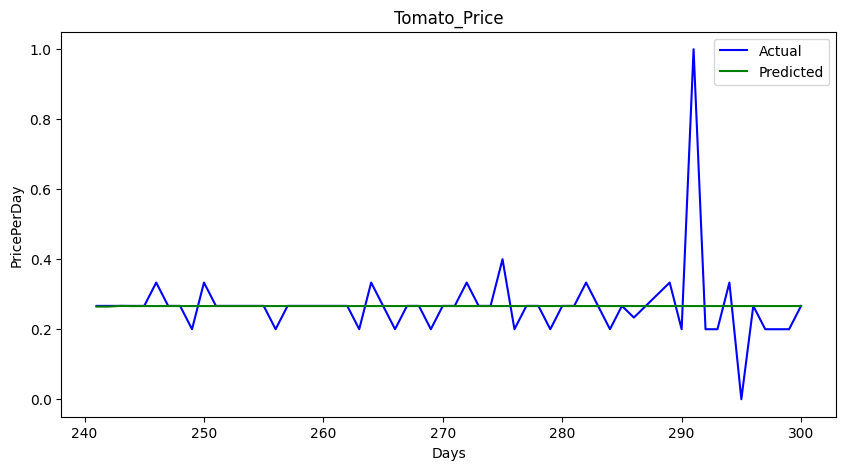

In [74]:
from stockFunctions import graph
graph(y_test["MinPrice"],pred["MinPrice"],"Actual","Predicted","Tomato_Price","Days","PricePerDay")

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test_inv_df_Form["MaxPrice"], color = 'blue', label="Actual")
plt.plot(forecast_ori_in_df_Form["MaxPrice"], color = 'red', label ="Predicted")